In [1]:
### Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import os

In [2]:
### Make sure that 'ggplot' style is used for all plots
plt.style.use('ggplot')
# plt.style.available ### To view all other available styles

In [3]:
### Set Working Directory (WD)
os.chdir('/Volumes/GoogleDrive/My Drive/CEMEX/Data Translators/GitHub/rgamerosl/capstone-project')

In [4]:
### Read the data
df = pd.read_excel("dataset/data_v0.xlsx")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021336 entries, 0 to 1021335
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             466786 non-null  datetime64[ns]
 1   Plate            466786 non-null  object        
 2   Year_Model       464710 non-null  float64       
 3   Manufacturer     465987 non-null  object        
 4   GPS              466786 non-null  object        
 5   Zone             466784 non-null  object        
 6   City             466784 non-null  object        
 7   TurnOn           466786 non-null  float64       
 8   Idle_time        466786 non-null  float64       
 9   Fuel_used        446005 non-null  float64       
 10  Mileage          444080 non-null  float64       
 11  Speed            466786 non-null  float64       
 12  Engine_hrs       466756 non-null  float64       
 13  liters_per_hour  466786 non-null  object        
 14  km_per_liter     4

In [6]:
df.iloc[-1,]

Date                NaT
Plate               NaN
Year_Model          NaN
Manufacturer        NaN
GPS                 NaN
Zone                NaN
City                NaN
TurnOn              NaN
Idle_time           NaN
Fuel_used           NaN
Mileage             NaN
Speed               NaN
Engine_hrs          NaN
liters_per_hour     NaN
km_per_liter        NaN
Hrs_eff             NaN
Plant               NaN
Drive_time         None
Name: 1021335, dtype: object

In [7]:
### For some strange reason when reading the Excel file it detects 1'021,336 entries. However I know there are only 466,786 differente entries, everything else are just empty rows
df = df.iloc[0:466786,0:18]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466786 entries, 0 to 466785
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             466786 non-null  datetime64[ns]
 1   Plate            466786 non-null  object        
 2   Year_Model       464710 non-null  float64       
 3   Manufacturer     465987 non-null  object        
 4   GPS              466786 non-null  object        
 5   Zone             466784 non-null  object        
 6   City             466784 non-null  object        
 7   TurnOn           466786 non-null  float64       
 8   Idle_time        466786 non-null  float64       
 9   Fuel_used        446005 non-null  float64       
 10  Mileage          444080 non-null  float64       
 11  Speed            466786 non-null  float64       
 12  Engine_hrs       466756 non-null  float64       
 13  liters_per_hour  466786 non-null  object        
 14  km_per_liter     466

In [8]:
df_backup = df.copy(deep=True)

In [9]:
display(df.head(7))

,Date,Plate,Year_Model,Manufacturer,GPS,Zone,City,TurnOn,Idle_time,Fuel_used,Mileage,Speed,Engine_hrs,liters_per_hour,km_per_liter,Hrs_eff,Plant,Drive_time
0,2020-01-01,CR3570,2007.0,Kenworth,ECM,PAC,PUERTO VALLARTA,6.0,0.272917,42.0,0.879722,2.30,7.950000,5.283019,0.020946,5.605043,DD63,07:57:00
1,2020-01-01,CR3739,2008.0,International,ECM,PAC,PUERTO VALLARTA,4.0,0.019444,15.0,0.501667,25.55,1.866667,8.035714,0.033444,,,01:52:00
2,2020-01-01,CR3784,2008.0,International,ECM,PAC,MEXICALI,1.0,0.000000,NaN,4.585000,0.00,0.000000,,,,,1899-12-30 00:00:00
3,2020-01-01,CR3920,2007.0,Kenworth,ECM,PAC,PUERTO VALLARTA,3.0,0.095139,28.0,0.262222,12.27,3.516667,7.962085,0.009365,2.802521,DD63,03:31:00
4,2020-01-01,CR4189,2014.0,International,ECM,NOR,COAHUILA NORTE,1.0,0.076389,13.0,5.900000,0.44,25.550000,0.508806,0.453846,,,1900-01-01 01:33:00
5,2020-01-01,CR4807,2018.0,Foton,ECM,CEN,PACHUCA,1.0,0.000000,NaN,0.273611,0.00,0.000000,,,,,1899-12-30 00:00:00
6,2020-01-02,CR2389,2005.0,Kenworth,GPS,NOR,MONTERREY,5.0,0.161806,NaN,0.000000,8.97,5.683333,,,4.536389,DF05,05:41:00


### Considering that "liters_per_hour" is simple the division between "Fuel_used" and "Engine_hrs" then I should exclude these two columns from my model
### Also as I see it the "Drive_time" is only transform the "Engine_hrs" into hh:mm:ss format, therefore it should also be ignored.

In [10]:
df['liters_per_hour'].describe()

count     466786
unique     88688
top             
freq       26634
Name: liters_per_hour, dtype: object

In [11]:
### First replace empty strings with nan
df['km_per_liter'] = df['km_per_liter'].replace(r'^\s*$', np.nan, regex=True)
### Transform strings into float numbers
df['km_per_liter'] = df['km_per_liter'].astype(float)

In [12]:
### First replace empty strings with nan
df['Hrs_eff'] = df['Hrs_eff'].replace(r'^\s*$', np.nan, regex=True)
### Transform strings into float numbers
df['Hrs_eff'] = df['Hrs_eff'].astype(float)

In [13]:
### First replace empty strings with nan
df['liters_per_hour'] = df['liters_per_hour'].replace(r'^\s*$', np.nan, regex=True)
### Transform strings into float numbers
df['liters_per_hour'] = df['liters_per_hour'].astype(float)

In [14]:
df['liters_per_hour'].describe()

count    440152.000000
mean          7.497637
std          75.667475
min       -3429.512697
25%           5.880682
50%           7.132547
75%           8.605578
max       45807.209302
Name: liters_per_hour, dtype: float64

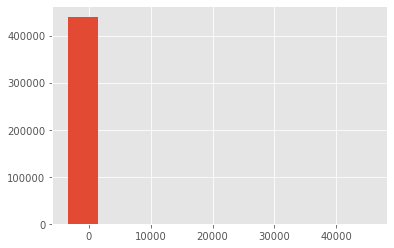

In [15]:
plt.hist(df['liters_per_hour'])
plt.show()

In [16]:
### Save dataset with outliers for liters_per_hour
# outliers1 = df.loc[abs(df['liters_per_hour']) > 20,]
# outliers2 = df.loc[df['liters_per_hour'] < 0,]
# outliers = pd.concat([outliers1, outliers2])
# # outliers.to_excel("dataset/outliers_lts.xlsx")

In [17]:
### Save dataset with outliers for Engine_hrs and Idle_time
# outliers_1 = df.loc[abs(df['Engine_hrs']) > 24,]
# outliers_2 = df.loc[abs(df["Idle_time"]) > 1,]
# outliers_ = pd.concat([outliers_1, outliers_2])
# # outliers_.to_excel("dataset/outliers_hrs.xlsx")

In [18]:
### Everything bigger than 20 should be nan
df.loc[abs(df['liters_per_hour']) > 20,'liters_per_hour'] = np.nan
### Also every negative value should be nan
df.loc[df['liters_per_hour'] < 0,'liters_per_hour'] = np.nan

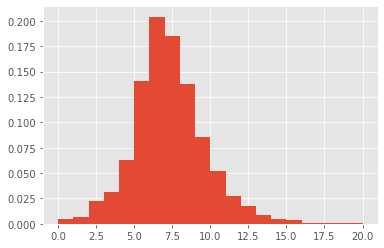

In [19]:
plt.hist(df['liters_per_hour'], density=True, bins=20)
# plt.savefig('figures/histogram-liters_per_hour.png')
plt.show()

In [20]:
df['liters_per_hour'].describe()

count    439702.000000
mean          7.309644
std           2.409255
min           0.000000
25%           5.878963
50%           7.129537
75%           8.599509
max          20.000000
Name: liters_per_hour, dtype: float64

In [21]:
### Amount of nan in the liters_per_hour (target value)
df['liters_per_hour'].isna().sum()/len(df['liters_per_hour'])

0.05802230572467897

In [22]:
df['Manufacturer'].unique()

array(['Kenworth', 'International', 'Foton', nan, 'FREIGHTLINER',
       'freightliner', 'INTERNATIONAL', 'MAN', 'Sinotruk', 'Scania',
       'Astra', 'Volvo'], dtype=object)

In [23]:
### Find out how many observations we have from each manufacturer
df.Manufacturer.value_counts()

Foton            149425
Kenworth         138533
International     82909
MAN               73854
Sinotruk          10494
FREIGHTLINER       8850
freightliner       1252
INTERNATIONAL       244
Scania              176
Astra               141
Volvo               109
Name: Manufacturer, dtype: int64

In [24]:
### Group different spellings for the same manufacturer

df.loc[df['Manufacturer']=="INTERNATIONAL","Manufacturer"] = "International"
df.loc[df['Manufacturer']=="FREIGHTLINER","Manufacturer"] = "Freightliner"
df.loc[df['Manufacturer']=="freightliner","Manufacturer"] = "Freightliner"
df.loc[df['Manufacturer']=="MAN","Manufacturer"] = "Man"

In [25]:
### Count the amount of differents trucks analysed by Manufacturers
print(len(df_backup['Plate'].unique()))
df.groupby('Manufacturer').Plate.nunique() 

### Something could be wrong as there are only 2330 different Plates numbers, however when doing the counts by manufacturer I get 2592 Plates.

2330


Manufacturer
Astra              1
Foton            817
Freightliner      68
International    498
Kenworth         663
Man              289
Scania             1
Sinotruk         254
Volvo              1
Name: Plate, dtype: int64

In [26]:
Plates = df.groupby('Plate').Manufacturer.nunique()
display(Plates.head(10))

Plate
CR2389    1
CR2516    1
CR2521    1
CR2526    1
CR2584    1
CR2607    1
CR2613    1
CR2629    1
CR2630    1
CR2689    1
Name: Manufacturer, dtype: int64

In [27]:
len(Plates[Plates > 1])
display(Plates[Plates > 1])

# Plates[Plates > 1].to_excel("dataset/CRs_with_2_Manufacturers.xlsx")

### There are 262 Plates numbers that have listed 2 different manufacturers, what should we do with those?
### Maybe look for an extra dataset only with the Plate number and Manufacturer to validate the real value for the Manufacturer of these 262 Trucks

Plate
CR2856    2
CR3213    2
CR3535    2
CR3682    2
CR3788    2
         ..
CR5394    2
CR5395    2
CR5396    2
CR5397    2
CR5398    2
Name: Manufacturer, Length: 262, dtype: int64

In [28]:
CRs = df_backup[df_backup["Plate"].isin(Plates[Plates > 1].index.values)]
len(CRs['Plate'].unique())

# CRs.to_excel("dataset/CRs_multiple_manufacturers.xlsx")

262

In [29]:
df.loc[df["Plate"]=="CR2856","Manufacturer"].unique()

array(['Kenworth', 'Foton'], dtype=object)

In [30]:
### Considering that there are only 1 truck from the following Manufactrers: Astra, Scania and Volvo, I think we could get rid of these 3 trucks for the analysis
df2 = df[~df.Manufacturer.isin(["Astra", "Scania", "Volvo"])]
print(df2.Manufacturer.value_counts())
print(df2.groupby('Manufacturer').Plate.nunique())

Foton            149425
Kenworth         138533
International     83153
Man               73854
Sinotruk          10494
Freightliner      10102
Name: Manufacturer, dtype: int64
Manufacturer
Foton            817
Freightliner      68
International    498
Kenworth         663
Man              289
Sinotruk         254
Name: Plate, dtype: int64


In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466360 entries, 0 to 466785
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             466360 non-null  datetime64[ns]
 1   Plate            466360 non-null  object        
 2   Year_Model       464284 non-null  float64       
 3   Manufacturer     465561 non-null  object        
 4   GPS              466360 non-null  object        
 5   Zone             466358 non-null  object        
 6   City             466358 non-null  object        
 7   TurnOn           466360 non-null  float64       
 8   Idle_time        466360 non-null  float64       
 9   Fuel_used        445922 non-null  float64       
 10  Mileage          443679 non-null  float64       
 11  Speed            466360 non-null  float64       
 12  Engine_hrs       466330 non-null  float64       
 13  liters_per_hour  439620 non-null  float64       
 14  km_per_liter     424

In [32]:
df2.loc[0,'Date']

Timestamp('2020-01-01 00:00:00')

In [33]:
### Add column for Weekdays (0: Monday to 6: Sunday)
df2['Weekday'] = pd.to_datetime(df2['Date']).dt.dayofweek

In [34]:
df2.loc[1,]

Date               2020-01-01 00:00:00
Plate                           CR3739
Year_Model                      2008.0
Manufacturer             International
GPS                                ECM
Zone                               PAC
City                   PUERTO VALLARTA
TurnOn                             4.0
Idle_time                     0.019444
Fuel_used                         15.0
Mileage                       0.501667
Speed                            25.55
Engine_hrs                    1.866667
liters_per_hour               8.035714
km_per_liter                  0.033444
Hrs_eff                            NaN
Plant                                 
Drive_time                    01:52:00
Weekday                              2
Name: 1, dtype: object

In [35]:
df2['Weekday'].unique()

array([2, 3, 4, 5, 6, 0, 1])

In [36]:
df2.Weekday.value_counts().sort_index()

0    70914
1    78040
2    77756
3    78016
4    76132
5    71527
6    13975
Name: Weekday, dtype: int64

In [37]:
df2['Idle_time'].describe()
### It looks to me like Idle_time should always be a value between 0 and 1, so maybe everything bigger than 1 could be a typo (should it be divided by 24 maybe?)

count    466360.000000
mean          0.313033
std           0.820372
min           0.000000
25%           0.102083
50%           0.185417
75%           0.259722
max          23.920278
Name: Idle_time, dtype: float64

In [38]:
df2['TurnOn'].describe()
### Higher values seems very unlikely, what to do with them?

count    466360.000000
mean         39.038312
std         314.463860
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max        4964.000000
Name: TurnOn, dtype: float64

In [39]:
df2['Engine_hrs'].describe()
### How could you have Engine_hrs bigger than 24 in just one day?

count    466330.000000
mean          7.505626
std          13.176143
min           0.000000
25%           4.716667
50%           7.883333
75%          10.150000
max        4644.089722
Name: Engine_hrs, dtype: float64

In [40]:
df2.loc[abs(df2['Engine_hrs']) > 24,].shape


(1318, 19)

In [41]:
df2.loc[abs(df2['Idle_time']) > 1,].shape

(14503, 19)

In [42]:
### Delete entries with Engine_hrs bigger than 24
indexEngine = df2.loc[abs(df2['Engine_hrs'] > 24),].index
df2.drop(indexEngine,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 465042 entries, 0 to 466785
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             465042 non-null  datetime64[ns]
 1   Plate            465042 non-null  object        
 2   Year_Model       462968 non-null  float64       
 3   Manufacturer     464244 non-null  object        
 4   GPS              465042 non-null  object        
 5   Zone             465040 non-null  object        
 6   City             465040 non-null  object        
 7   TurnOn           465042 non-null  float64       
 8   Idle_time        465042 non-null  float64       
 9   Fuel_used        444715 non-null  float64       
 10  Mileage          442401 non-null  float64       
 11  Speed            465042 non-null  float64       
 12  Engine_hrs       465012 non-null  float64       
 13  liters_per_hour  438415 non-null  float64       
 14  km_per_liter     423

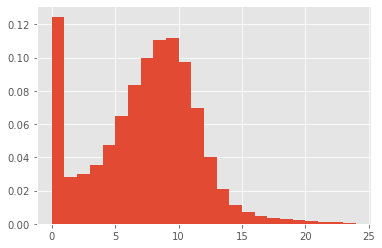

In [43]:
plt.hist(df2['Engine_hrs'], density=True, bins=24)
# plt.savefig('figures/histogram-Engine_hrs.png')
plt.show()

In [44]:
### Delete entries with Idle_time bigger than 1
indexIdle = df2.loc[abs(df2['Idle_time'] > 1),].index
df2.drop(indexIdle,inplace=True)
df2.info()

### Asks if delition is the way to go... maybe just leave those entries with pd.nan values could work
### The Engine_hrs I do believe need to be deleted as they are very few and they impact directly on the calculation of the target variable (liters_per_hour)
### But inn the Idle_time case, since is only a feature, maybe put them with pd.nan values could work

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450637 entries, 0 to 466785
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             450637 non-null  datetime64[ns]
 1   Plate            450637 non-null  object        
 2   Year_Model       448798 non-null  float64       
 3   Manufacturer     449911 non-null  object        
 4   GPS              450637 non-null  object        
 5   Zone             450635 non-null  object        
 6   City             450635 non-null  object        
 7   TurnOn           450637 non-null  float64       
 8   Idle_time        450637 non-null  float64       
 9   Fuel_used        430310 non-null  float64       
 10  Mileage          427996 non-null  float64       
 11  Speed            450637 non-null  float64       
 12  Engine_hrs       450629 non-null  float64       
 13  liters_per_hour  424040 non-null  float64       
 14  km_per_liter     409

In [45]:
df2['Idle_time'].describe()

count    450637.000000
mean          0.178950
std           0.113952
min           0.000000
25%           0.098611
50%           0.181250
75%           0.251389
max           0.998056
Name: Idle_time, dtype: float64

In [46]:
### Transform Idle_time to hours (multiply by 24)
df2['Idle_time'] = df2['Idle_time']*24
df2['Idle_time'].describe()

count    450637.000000
mean          4.294804
std           2.734838
min           0.000000
25%           2.366667
50%           4.350000
75%           6.033333
max          23.953333
Name: Idle_time, dtype: float64

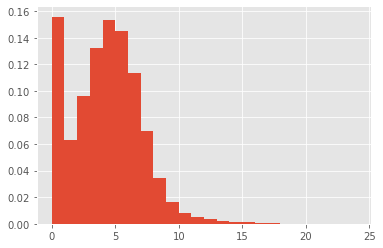

In [47]:
plt.hist(df2['Idle_time'], density=True, bins=24)
# plt.savefig('figures/histogram-Idle_time.png')
plt.show()

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450637 entries, 0 to 466785
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             450637 non-null  datetime64[ns]
 1   Plate            450637 non-null  object        
 2   Year_Model       448798 non-null  float64       
 3   Manufacturer     449911 non-null  object        
 4   GPS              450637 non-null  object        
 5   Zone             450635 non-null  object        
 6   City             450635 non-null  object        
 7   TurnOn           450637 non-null  float64       
 8   Idle_time        450637 non-null  float64       
 9   Fuel_used        430310 non-null  float64       
 10  Mileage          427996 non-null  float64       
 11  Speed            450637 non-null  float64       
 12  Engine_hrs       450629 non-null  float64       
 13  liters_per_hour  424040 non-null  float64       
 14  km_per_liter     409

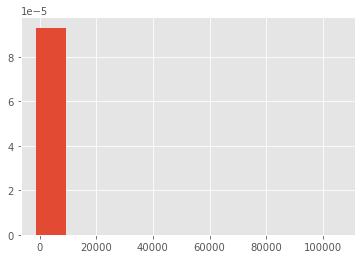

In [49]:
plt.hist(df2['Fuel_used'], density=True)
plt.show()

In [50]:
df2['Fuel_used'].describe()

count    430310.000000
mean         56.993912
std         172.944758
min       -1388.000000
25%          33.000000
50%          56.500000
75%          78.000000
max      106101.000000
Name: Fuel_used, dtype: float64

In [51]:
indexFuelNeg = df2.loc[df2['Fuel_used'] < 0,].index
df2.drop(indexFuelNeg,inplace=True)
indexFuelHigh = df2.loc[df2['Fuel_used'] > 200,].index
df2.drop(indexFuelHigh,inplace=True)

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450224 entries, 0 to 466785
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             450224 non-null  datetime64[ns]
 1   Plate            450224 non-null  object        
 2   Year_Model       448387 non-null  float64       
 3   Manufacturer     449498 non-null  object        
 4   GPS              450224 non-null  object        
 5   Zone             450222 non-null  object        
 6   City             450222 non-null  object        
 7   TurnOn           450224 non-null  float64       
 8   Idle_time        450224 non-null  float64       
 9   Fuel_used        429897 non-null  float64       
 10  Mileage          427585 non-null  float64       
 11  Speed            450224 non-null  float64       
 12  Engine_hrs       450216 non-null  float64       
 13  liters_per_hour  423663 non-null  float64       
 14  km_per_liter     409

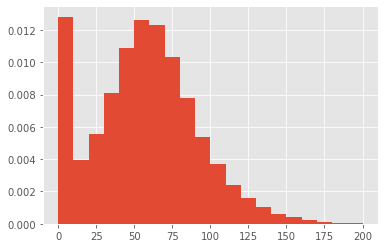

In [52]:
plt.hist(df2['Fuel_used'], density=True, bins=20)
# plt.savefig('figures/histogram-Fuel_used.png')
plt.show()

In [53]:
manufacturer_catalog = pd.read_excel("dataset/Catalog.xlsx")
manufacturer_catalog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3269 entries, 0 to 3268
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Plate         3269 non-null   object
 1   Year_Model    3269 non-null   int64 
 2   Manufacturer  3269 non-null   object
dtypes: int64(1), object(2)
memory usage: 76.7+ KB


In [54]:
manufacturer_catalog.columns=["Plate", "Year_Model2", "Manufacturer2"]

In [55]:
display(manufacturer_catalog.head(10))

,Plate,Year_Model2,Manufacturer2
0,CR1670,1999,International
1,CR1765,2000,Kenworth
2,CR1768,2000,Kenworth
3,CR1772,2000,Kenworth
4,CR1777,2000,Freightliner
5,CR1779,2000,Freightliner
6,CR1800,2000,Volvo
7,CR1814,2000,Volvo
8,CR1823,2000,Kenworth
9,CR1825,2000,Kenworth


In [56]:
df3 = df2.merge(manufacturer_catalog,on='Plate',how="left")
display(df3.head(10))

,Date,Plate,Year_Model,Manufacturer,GPS,Zone,City,TurnOn,Idle_time,Fuel_used,...,Speed,Engine_hrs,liters_per_hour,km_per_liter,Hrs_eff,Plant,Drive_time,Weekday,Year_Model2,Manufacturer2
0,2020-01-01,CR3570,2007.0,Kenworth,ECM,PAC,PUERTO VALLARTA,6.0,6.550000,42.0,...,2.30,7.950000,5.283019,0.020946,5.605043,DD63,07:57:00,2,2007.0,Kenworth
1,2020-01-01,CR3739,2008.0,International,ECM,PAC,PUERTO VALLARTA,4.0,0.466667,15.0,...,25.55,1.866667,8.035714,0.033444,NaN,,01:52:00,2,2007.0,International
2,2020-01-01,CR3784,2008.0,International,ECM,PAC,MEXICALI,1.0,0.000000,NaN,...,0.00,0.000000,NaN,NaN,NaN,,1899-12-30 00:00:00,2,2007.0,International
3,2020-01-01,CR3920,2007.0,Kenworth,ECM,PAC,PUERTO VALLARTA,3.0,2.283333,28.0,...,12.27,3.516667,7.962085,0.009365,2.802521,DD63,03:31:00,2,2007.0,Kenworth
4,2020-01-01,CR4807,2018.0,Foton,ECM,CEN,PACHUCA,1.0,0.000000,NaN,...,0.00,0.000000,NaN,NaN,NaN,,1899-12-30 00:00:00,2,2018.0,Foton Daimler
5,2020-01-02,CR2389,2005.0,Kenworth,GPS,NOR,MONTERREY,5.0,3.883333,NaN,...,8.97,5.683333,NaN,NaN,4.536389,DF05,05:41:00,3,2005.0,Kenworth
6,2020-01-02,CR2526,2005.0,Kenworth,ECM,PAC,GUADALAJARA,2.0,0.416667,21.0,...,9.53,4.050000,5.185185,0.000000,2.945278,DD49,04:03:00,3,2005.0,Kenworth
7,2020-01-02,CR2584,2005.0,International,ECM,PAC,PUERTO VALLARTA,2.0,0.100000,1.0,...,0.30,0.133333,7.500000,5.100278,NaN,,00:08:00,3,2005.0,International
8,2020-01-02,CR2607,2005.0,International,GPS,NOR,COAHUILA NORTE,4.0,3.216667,27.0,...,5.68,4.233333,6.377953,0.003158,6.280556,DE90,04:14:00,3,2005.0,International
9,2020-01-02,CR2629,2006.0,International,ECM,CEN,QUERETARO,4.0,0.083333,2.0,...,1.02,0.166667,12.000000,1.450417,2.469167,DG51,00:10:00,3,2005.0,International


In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450224 entries, 0 to 450223
Data columns (total 21 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             450224 non-null  datetime64[ns]
 1   Plate            450224 non-null  object        
 2   Year_Model       448387 non-null  float64       
 3   Manufacturer     449498 non-null  object        
 4   GPS              450224 non-null  object        
 5   Zone             450222 non-null  object        
 6   City             450222 non-null  object        
 7   TurnOn           450224 non-null  float64       
 8   Idle_time        450224 non-null  float64       
 9   Fuel_used        429897 non-null  float64       
 10  Mileage          427585 non-null  float64       
 11  Speed            450224 non-null  float64       
 12  Engine_hrs       450216 non-null  float64       
 13  liters_per_hour  423663 non-null  float64       
 14  km_per_liter     409

In [58]:
Plates2 = df3.groupby('Plate').Manufacturer.nunique()
Plates2[Plates2 > 1]

Plate
CR2856    2
CR3213    2
CR3535    2
CR3682    2
CR3788    2
         ..
CR5394    2
CR5395    2
CR5396    2
CR5397    2
CR5398    2
Name: Manufacturer, Length: 209, dtype: int64

In [59]:
Plates3 = df3.groupby('Plate').Manufacturer2.nunique()
Plates3[Plates3 > 1]

Series([], Name: Manufacturer2, dtype: int64)

In [60]:
df3.loc[df3["Plate"]=="CR5395","Manufacturer"].unique()

array(['Sinotruk', 'Foton'], dtype=object)

In [61]:
df3.loc[df3["Plate"]=="CR5395","Manufacturer2"].unique()

array(['Sinotruk'], dtype=object)

In [62]:
df3['Manufacturer'] = df3['Manufacturer2']
df3['Year_Model'] = df3['Year_Model2']

df4 = df3.iloc[0:450224,0:19]

In [63]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450224 entries, 0 to 450223
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             450224 non-null  datetime64[ns]
 1   Plate            450224 non-null  object        
 2   Year_Model       450220 non-null  float64       
 3   Manufacturer     450220 non-null  object        
 4   GPS              450224 non-null  object        
 5   Zone             450222 non-null  object        
 6   City             450222 non-null  object        
 7   TurnOn           450224 non-null  float64       
 8   Idle_time        450224 non-null  float64       
 9   Fuel_used        429897 non-null  float64       
 10  Mileage          427585 non-null  float64       
 11  Speed            450224 non-null  float64       
 12  Engine_hrs       450216 non-null  float64       
 13  liters_per_hour  423663 non-null  float64       
 14  km_per_liter     409

In [64]:
df4['TurnOn'].describe()

count    450224.000000
mean          7.811276
std          85.168433
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max        4964.000000
Name: TurnOn, dtype: float64

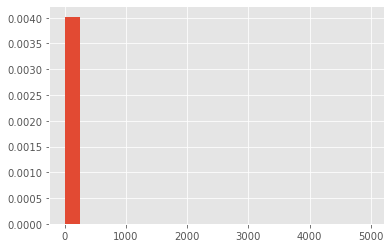

In [65]:
plt.hist(df4['TurnOn'], density=True, bins=20)
plt.show()

In [66]:
### Put a threshold for the amount of times the motor of each truck is TurnOn along the day
df4[df4['TurnOn']>20]['TurnOn'].count()

3549

In [67]:
df4[df4['TurnOn']<=20]['TurnOn'].describe()

count    446675.000000
mean          4.570276
std           3.133822
min           0.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          20.000000
Name: TurnOn, dtype: float64

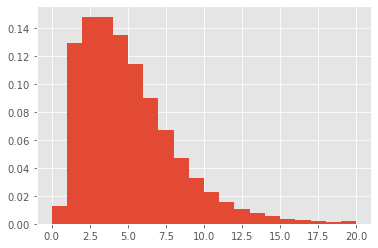

In [68]:
plt.hist(df4[df4['TurnOn']<=20]['TurnOn'], density=True, bins=20)
# plt.savefig('figures/histogram-TurnOn.png')
plt.show()

In [69]:
### Delete entries with TurnOn bigger than 20
indexTurnOn = df4.loc[abs(df4['TurnOn'] > 20),].index
df4.drop(indexTurnOn,inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446675 entries, 0 to 450223
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date             446675 non-null  datetime64[ns]
 1   Plate            446675 non-null  object        
 2   Year_Model       446671 non-null  float64       
 3   Manufacturer     446671 non-null  object        
 4   GPS              446675 non-null  object        
 5   Zone             446673 non-null  object        
 6   City             446673 non-null  object        
 7   TurnOn           446675 non-null  float64       
 8   Idle_time        446675 non-null  float64       
 9   Fuel_used        426429 non-null  float64       
 10  Mileage          424122 non-null  float64       
 11  Speed            446675 non-null  float64       
 12  Engine_hrs       446668 non-null  float64       
 13  liters_per_hour  420212 non-null  float64       
 14  km_per_liter     405

In [70]:
df4['Mileage'].describe()

count    424122.000000
mean         99.854841
std         523.740484
min           0.000000
25%          44.230000
50%          82.280000
75%         131.310000
max      113274.000000
Name: Mileage, dtype: float64

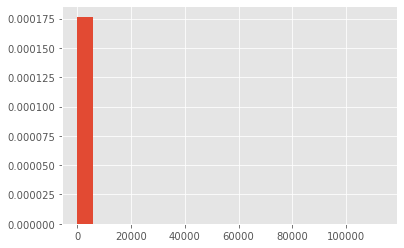

In [71]:
plt.hist(df4['Mileage'], density=True, bins=20)
plt.show()

In [72]:
df4.loc[df4['Mileage']>500,]['Mileage'].count()

464

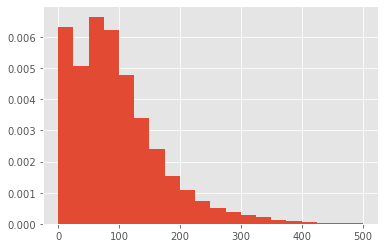

In [73]:
plt.hist(df4.loc[df4['Mileage']<=500]['Mileage'], density=True, bins=20)
# plt.savefig('figures/histogram-Mileage.png')
plt.show()

In [74]:
### Delete entries with Mileage higher than 500
indexMileage = df4.loc[abs(df4['Mileage'] > 500),].index
df4.drop(indexMileage,inplace=True)
df4.reset_index(inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446211 entries, 0 to 446210
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   index            446211 non-null  int64         
 1   Date             446211 non-null  datetime64[ns]
 2   Plate            446211 non-null  object        
 3   Year_Model       446207 non-null  float64       
 4   Manufacturer     446207 non-null  object        
 5   GPS              446211 non-null  object        
 6   Zone             446209 non-null  object        
 7   City             446209 non-null  object        
 8   TurnOn           446211 non-null  float64       
 9   Idle_time        446211 non-null  float64       
 10  Fuel_used        425967 non-null  float64       
 11  Mileage          423658 non-null  float64       
 12  Speed            446211 non-null  float64       
 13  Engine_hrs       446204 non-null  float64       
 14  liters_per_hour  419

In [75]:
df4 = df4.drop('index',axis=1)
df4['liters_per_hour'].count()/df_backup.shape[0]

0.8992364809570125

In [ ]:
# df4.to_excel("dataset/data_v1.xlsx", index=False)